In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
import os

In [2]:
IMG_WIDTH, IMG_HEIGHT = 224, 224
training_data = []
dir = 'im/'
folders = ['with_mask', 'without_mask']

In [3]:
def create_data(verbose=1):
    for folder in folders:
        path = os.path.join(dir, folder)
        im_class = folders.index(folder)
        
        for i, img in enumerate(os.listdir(path)):
            try:
                im_arr = cv2.imread(os.path.join(path, img))
                im_arr = cv2.resize(im_arr, (IMG_WIDTH, IMG_HEIGHT))
            except:
                break
            training_data.append([im_arr, im_class])
            if verbose and (i % 100 == 0): 
                print(f'Image {i+1} done.')

In [4]:
create_data()

Image 1 done.
Image 101 done.
Image 201 done.
Image 301 done.
Image 401 done.
Image 501 done.
Image 601 done.
Image 1 done.
Image 101 done.
Image 201 done.
Image 301 done.
Image 401 done.
Image 501 done.
Image 601 done.
Image 701 done.
Image 801 done.
Image 901 done.
Image 1001 done.
Image 1101 done.
Image 1201 done.
Image 1301 done.
Image 1401 done.
Image 1501 done.
Image 1601 done.
Image 1701 done.
Image 1801 done.
Image 1901 done.


In [5]:
len(training_data)

2578

In [6]:
random.shuffle(training_data)

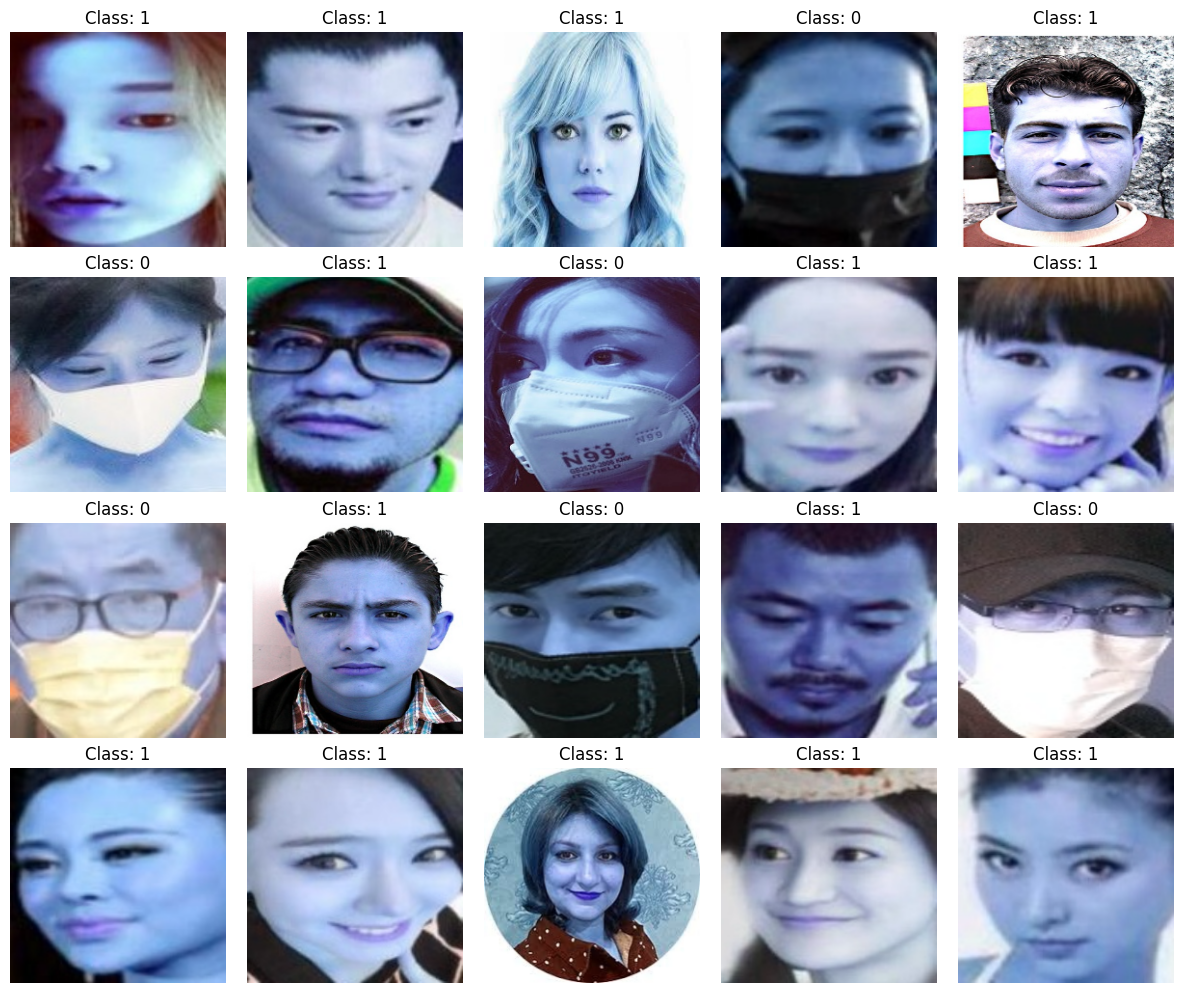

In [7]:
rows, cols = 4, 5
plt.figure(figsize=(12, 10))

for i in range(20):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(training_data[i][0])
    plt.title(f"Class: {training_data[i][1]}", fontsize=12)
    plt.axis('off')

plt.tight_layout()

In [8]:
X, y = [], []

for im, label in training_data:
    X.append(im)
    y.append(label)

In [9]:
X = np.array(X).reshape(-1, IMG_WIDTH, IMG_HEIGHT, 3)
y = np.array(y)
X = X / 255.0

In [ ]:
""" hdf5_file = "training_data.h5"

with h5py.File(hdf5_file, "w") as f:
    f.create_dataset("X", data=X)
    f.create_dataset("y", data=y) """

In [10]:
with open('images_array_tiny.pkl', 'wb') as file:
    pickle.dump(X, file)

In [11]:
with open('features_array_tiny.pkl', 'wb') as file:
    pickle.dump(y, file)

In [12]:
del X
del y
del training_data
import gc
gc.collect()

42121